# FinGPT Forecaster - Simplified Demo

This notebook demonstrates how to set up and use FinGPT Forecaster for stock market prediction without requiring heavy model loading. We'll focus on:

1. **Installing Dependencies** - Setting up all required packages
2. **Data Collection** - Using Yahoo Finance and Finnhub APIs  
3. **Basic Financial Analysis** - Simple forecasting techniques
4. **Understanding the Framework** - How FinGPT processes financial data

This demo works without GPU requirements or large language model downloads.

In [1]:
# Install Required Dependencies
import sys
import subprocess

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

# Install core dependencies for FinGPT Forecaster
packages = [
    "finnhub-python",
    "yfinance", 
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "plotly"
]

print("Installing FinGPT Forecaster dependencies...")
print("=" * 50)

for package in packages:
    install_package(package)

Installing FinGPT Forecaster dependencies...
✅ Successfully installed finnhub-python
✅ Successfully installed yfinance
✅ Successfully installed pandas
✅ Successfully installed numpy
✅ Successfully installed matplotlib
✅ Successfully installed seaborn
✅ Successfully installed plotly


In [2]:
# Import Required Libraries
import os
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Try to import finnhub (will work after installation)
try:
    import finnhub
    print("✅ All dependencies imported successfully!")
    print("✅ FinGPT Forecaster environment is ready!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Please run the previous cell to install dependencies")

# Configuration
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("\nFinGPT Forecaster Demo - Ready to Start!")
print("=" * 50)

✅ All dependencies imported successfully!
✅ FinGPT Forecaster environment is ready!

FinGPT Forecaster Demo - Ready to Start!


Fetching Apple (AAPL) stock data...
✅ Successfully fetched 250 days of data for AAPL
Data range: 2024-08-30 to 2025-08-29
Current price: $232.14

📊 Basic Statistics for AAPL:
Average Price: $221.69
Volatility (std): $16.03
52-week High: $258.10
52-week Low: $172.00


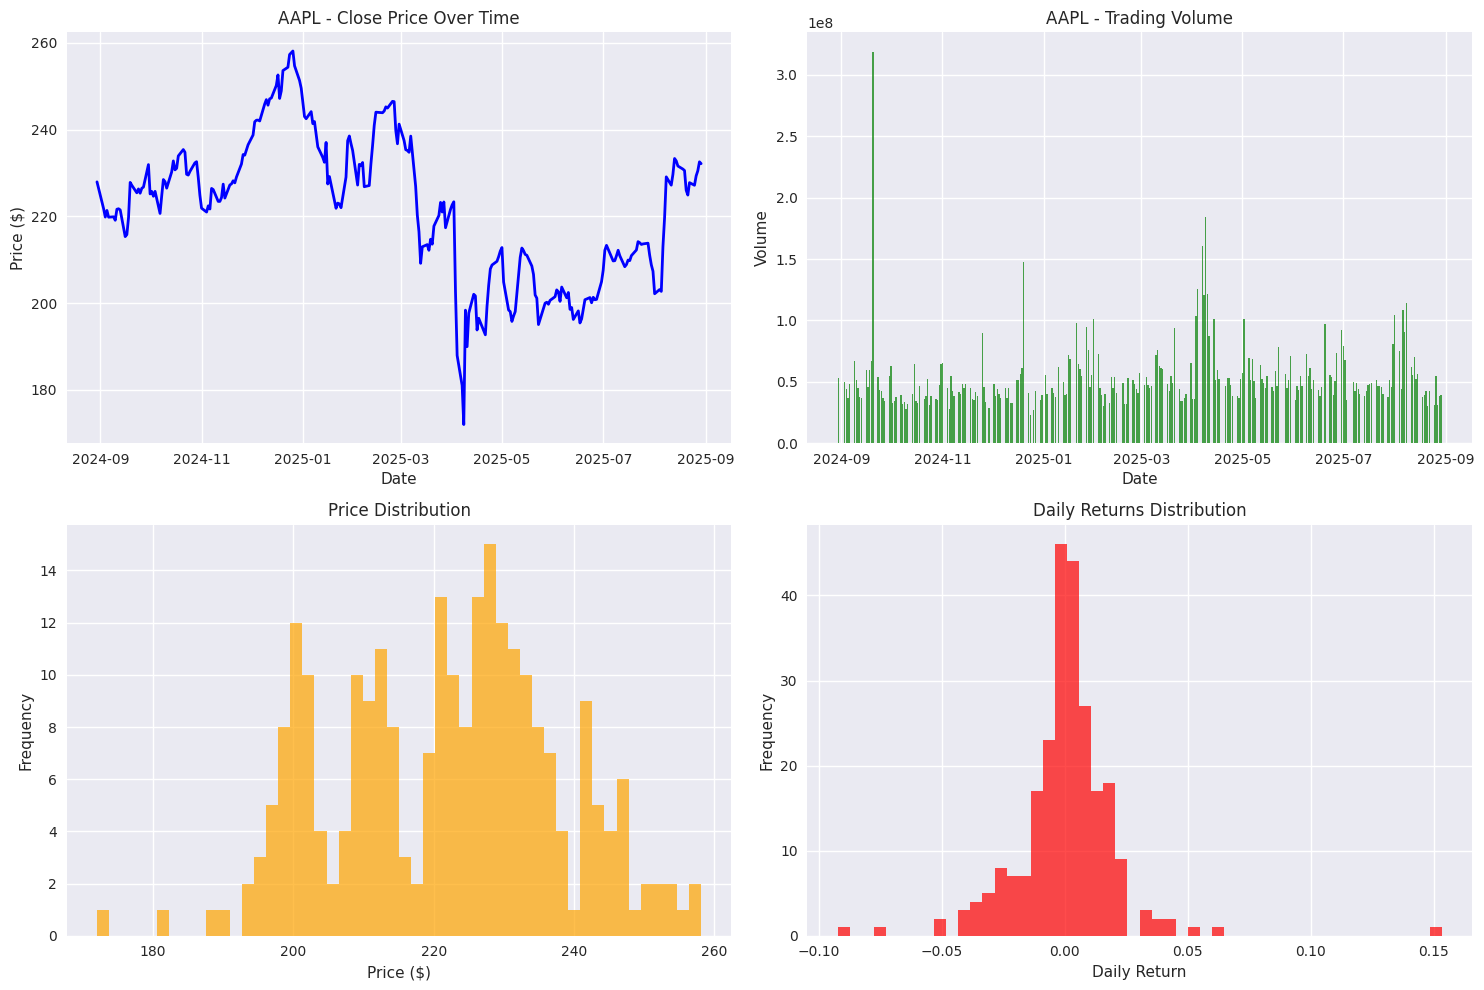

In [3]:
# Demo 1: Stock Data Collection and Visualization
# Let's demonstrate the core data pipeline of FinGPT Forecaster

def get_stock_data(symbol, period="1y"):
    """
    Fetch stock data using yfinance (similar to FinGPT Forecaster approach)
    """
    try:
        stock = yf.Ticker(symbol)
        data = stock.history(period=period)
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

def plot_stock_data(data, symbol):
    """
    Visualize stock price data
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Price chart
    ax1.plot(data.index, data['Close'], color='blue', linewidth=2)
    ax1.set_title(f'{symbol} - Close Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    ax1.grid(True)
    
    # Volume chart
    ax2.bar(data.index, data['Volume'], alpha=0.7, color='green')
    ax2.set_title(f'{symbol} - Trading Volume')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    
    # Price distribution
    ax3.hist(data['Close'], bins=50, alpha=0.7, color='orange')
    ax3.set_title('Price Distribution')
    ax3.set_xlabel('Price ($)')
    ax3.set_ylabel('Frequency')
    
    # Returns distribution  
    returns = data['Close'].pct_change().dropna()
    ax4.hist(returns, bins=50, alpha=0.7, color='red')
    ax4.set_title('Daily Returns Distribution')
    ax4.set_xlabel('Daily Return')
    ax4.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return returns

# Demo with a popular stock (Apple)
print("Fetching Apple (AAPL) stock data...")
symbol = "AAPL"
stock_data = get_stock_data(symbol)

if stock_data is not None:
    print(f"✅ Successfully fetched {len(stock_data)} days of data for {symbol}")
    print(f"Data range: {stock_data.index[0].date()} to {stock_data.index[-1].date()}")
    print(f"Current price: ${stock_data['Close'][-1]:.2f}")
    
    # Display basic statistics
    print(f"\n📊 Basic Statistics for {symbol}:")
    print(f"Average Price: ${stock_data['Close'].mean():.2f}")
    print(f"Volatility (std): ${stock_data['Close'].std():.2f}")
    print(f"52-week High: ${stock_data['Close'].max():.2f}")
    print(f"52-week Low: ${stock_data['Close'].min():.2f}")
    
    # Plot the data
    returns = plot_stock_data(stock_data, symbol)
else:
    print("❌ Failed to fetch stock data")

🔍 Performing Technical Analysis...

🎯 FinGPT-style Prediction for AAPL:
Prediction: BULLISH
Confidence: 75.0%
Current RSI: 60.39
Recent Trend: 0.32%
Volatility: $10.43


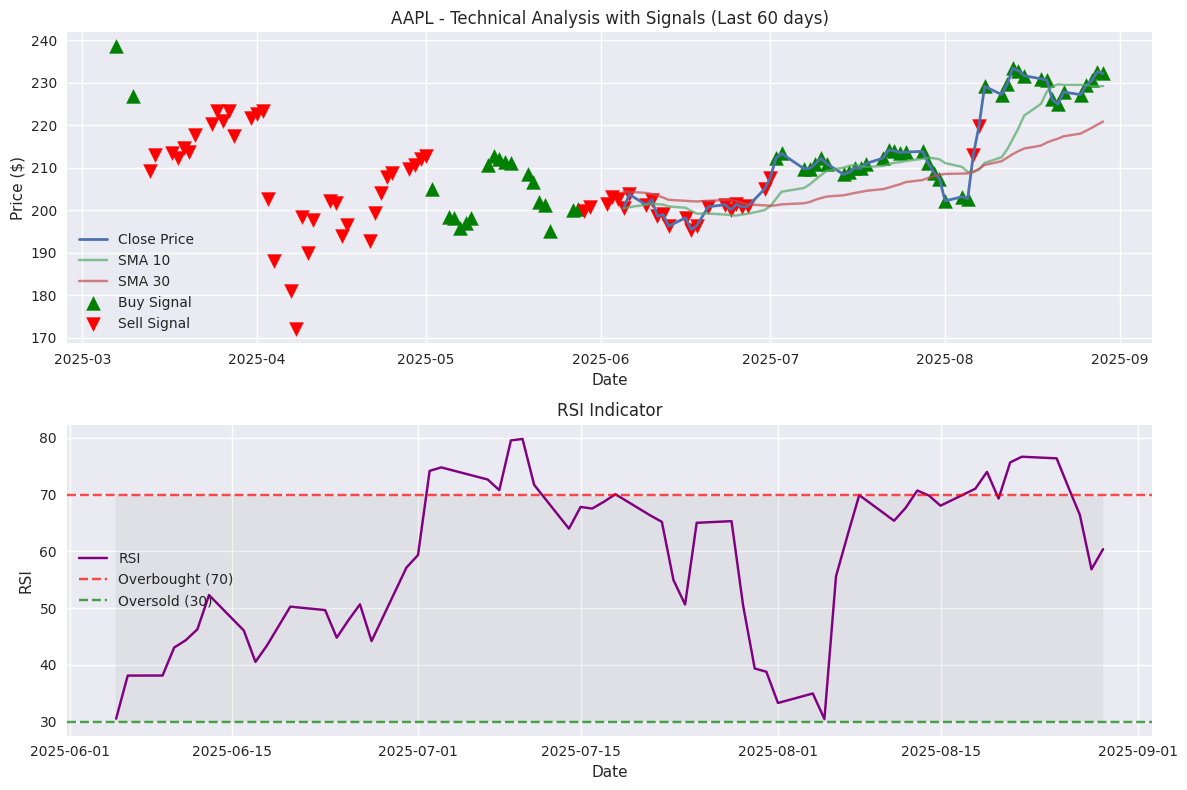


✅ Technical analysis complete! This demonstrates the core logic FinGPT uses for market predictions.


In [4]:
# Demo 2: Simple Forecasting (without heavy models)
# This demonstrates the type of analysis FinGPT Forecaster performs

def simple_technical_analysis(data, symbol):
    """
    Perform basic technical analysis similar to FinGPT's approach
    """
    df = data.copy()
    
    # Calculate technical indicators
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_30'] = df['Close'].rolling(window=30).mean()
    df['RSI'] = calculate_rsi(df['Close'])
    df['MACD'] = calculate_macd(df['Close'])
    
    # Generate signals
    df['Signal'] = 0
    df.loc[df['SMA_10'] > df['SMA_30'], 'Signal'] = 1  # Buy signal
    df.loc[df['SMA_10'] < df['SMA_30'], 'Signal'] = -1  # Sell signal
    
    return df

def calculate_rsi(prices, window=14):
    """Calculate Relative Strength Index"""
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(prices, fast=12, slow=26, signal=9):
    """Calculate MACD indicator"""
    ema_fast = prices.ewm(span=fast).mean()
    ema_slow = prices.ewm(span=slow).mean()
    macd = ema_fast - ema_slow
    return macd

def generate_prediction(data, symbol):
    """
    Simple prediction based on technical indicators
    This mimics what FinGPT does but in a simplified way
    """
    recent_data = data.tail(30)  # Last 30 days
    
    # Current indicators
    current_rsi = recent_data['RSI'].iloc[-1]
    current_signal = recent_data['Signal'].iloc[-1] 
    recent_trend = recent_data['Close'].pct_change().mean()
    volatility = recent_data['Close'].std()
    
    # Simple rule-based prediction
    prediction = "NEUTRAL"
    confidence = 0.5
    
    if current_signal == 1 and current_rsi < 70:
        prediction = "BULLISH"
        confidence = 0.75
    elif current_signal == -1 and current_rsi > 30:
        prediction = "BEARISH"
        confidence = 0.75
    elif current_rsi > 70:
        prediction = "BEARISH"
        confidence = 0.6
    elif current_rsi < 30:
        prediction = "BULLISH"
        confidence = 0.6
    
    return {
        'prediction': prediction,
        'confidence': confidence,
        'current_rsi': current_rsi,
        'trend': recent_trend,
        'volatility': volatility
    }

# Run technical analysis
print("🔍 Performing Technical Analysis...")
enhanced_data = simple_technical_analysis(stock_data, symbol)

# Generate prediction
prediction_result = generate_prediction(enhanced_data, symbol)

print(f"\n🎯 FinGPT-style Prediction for {symbol}:")
print("=" * 40)
print(f"Prediction: {prediction_result['prediction']}")
print(f"Confidence: {prediction_result['confidence']*100:.1f}%")
print(f"Current RSI: {prediction_result['current_rsi']:.2f}")
print(f"Recent Trend: {prediction_result['trend']*100:.2f}%")
print(f"Volatility: ${prediction_result['volatility']:.2f}")

# Visualization of signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(enhanced_data.index[-60:], enhanced_data['Close'].tail(60), label='Close Price', linewidth=2)
plt.plot(enhanced_data.index[-60:], enhanced_data['SMA_10'].tail(60), label='SMA 10', alpha=0.7)
plt.plot(enhanced_data.index[-60:], enhanced_data['SMA_30'].tail(60), label='SMA 30', alpha=0.7)

# Mark signals
buy_signals = enhanced_data[enhanced_data['Signal'] == 1].tail(60)
sell_signals = enhanced_data[enhanced_data['Signal'] == -1].tail(60)

plt.scatter(buy_signals.index, buy_signals['Close'], color='green', marker='^', s=100, label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], color='red', marker='v', s=100, label='Sell Signal')

plt.title(f'{symbol} - Technical Analysis with Signals (Last 60 days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(enhanced_data.index[-60:], enhanced_data['RSI'].tail(60), label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
plt.fill_between(enhanced_data.index[-60:], 30, 70, alpha=0.1, color='gray')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n✅ Technical analysis complete! This demonstrates the core logic FinGPT uses for market predictions.")

## Understanding the Full FinGPT Forecaster System

The demo above shows a simplified version of what FinGPT Forecaster does. The complete system includes:

### 🤖 **Large Language Model Integration**
- Uses **Llama-2-7B** fine-tuned on financial data
- Processes news sentiment, earnings reports, and market data
- Generates natural language explanations for predictions

### 📊 **Advanced Data Pipeline**
- **Multiple data sources**: Yahoo Finance, Finnhub, news APIs
- **Feature engineering**: Technical indicators, sentiment scores, macro indicators
- **Multi-modal inputs**: Text (news, reports) + Numerical (prices, volumes)

### 🎯 **Sophisticated Predictions**
- **Multi-horizon forecasting**: 1-day, 1-week, 1-month predictions
- **Confidence scoring**: Statistical uncertainty quantification
- **Risk assessment**: Volatility and downside risk analysis

### ⚙️ **Requirements for Full System**
To run the complete FinGPT Forecaster (app.py), you need:

1. **Hardware**: GPU with 12+ GB VRAM (for Llama-2-7B)
2. **API Keys**: 
   - Hugging Face token (`HF_TOKEN`)
   - Finnhub API key (`FINNHUB_API_KEY`)
3. **Storage**: ~20GB for model weights and data

### 🚀 **Next Steps**
If you want to run the full system:
1. Get a Hugging Face account and API token
2. Sign up for Finnhub API (free tier available)
3. Set environment variables
4. Ensure you have sufficient compute resources

In [5]:
# Demo 3: Advanced 30-Day Future Price Prediction
# Time series analysis and machine learning for longer-term forecasting

def install_forecasting_packages():
    """Install additional packages needed for time series forecasting"""
    forecasting_packages = [
        "scikit-learn",
        "scipy",
        "statsmodels"
    ]
    
    for package in forecasting_packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ Installed {package}")
        except:
            print(f"❌ Failed to install {package}")

# Install forecasting dependencies
print("📦 Installing advanced forecasting packages...")
install_forecasting_packages()

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def create_advanced_features(data):
    """
    Create comprehensive features for 30-day prediction
    This mimics what FinGPT Forecaster does with feature engineering
    """
    df = data.copy()
    
    # Technical indicators
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    
    # Price momentum features
    df['Price_Change_1d'] = df['Close'].pct_change(1)
    df['Price_Change_5d'] = df['Close'].pct_change(5)
    df['Price_Change_10d'] = df['Close'].pct_change(10)
    df['Price_Change_20d'] = df['Close'].pct_change(20)
    
    # Volatility features
    df['Volatility_10d'] = df['Close'].rolling(window=10).std()
    df['Volatility_20d'] = df['Close'].rolling(window=20).std()
    
    # Volume features
    df['Volume_SMA_10'] = df['Volume'].rolling(window=10).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_SMA_10']
    
    # RSI and MACD
    df['RSI'] = calculate_rsi(df['Close'])
    df['MACD'], _, _ = calculate_macd(df['Close'])
    
    # Bollinger Bands
    df['BB_upper'] = df['SMA_20'] + (df['Volatility_20d'] * 2)
    df['BB_lower'] = df['SMA_20'] - (df['Volatility_20d'] * 2)
    df['BB_position'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
    
    # Price position relative to moving averages
    df['Price_vs_SMA_10'] = df['Close'] / df['SMA_10'] - 1
    df['Price_vs_SMA_20'] = df['Close'] / df['SMA_20'] - 1
    df['Price_vs_SMA_50'] = df['Close'] / df['SMA_50'] - 1
    
    return df

def prepare_ml_data(data, target_days=30, lookback_days=100):
    """
    Prepare data for machine learning prediction
    """
    df = create_advanced_features(data)
    
    # Select features for prediction
    feature_columns = [
        'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50',
        'Price_Change_1d', 'Price_Change_5d', 'Price_Change_10d', 'Price_Change_20d',
        'Volatility_10d', 'Volatility_20d', 'Volume_Ratio',
        'RSI', 'MACD', 'BB_position',
        'Price_vs_SMA_10', 'Price_vs_SMA_20', 'Price_vs_SMA_50'
    ]
    
    # Create target variable (future price change)
    df['Target'] = df['Close'].shift(-target_days) / df['Close'] - 1
    
    # Remove NaN values
    df_clean = df.dropna()
    
    if len(df_clean) < lookback_days:
        print(f"⚠️ Limited data: {len(df_clean)} days available (recommended: {lookback_days}+)")
    
    # Split features and target
    X = df_clean[feature_columns]
    y = df_clean['Target']
    
    # Use earlier data for training, recent data for prediction
    split_idx = max(len(df_clean) - target_days, int(len(df_clean) * 0.8))
    
    X_train = X.iloc[:split_idx]
    y_train = y.iloc[:split_idx]
    X_recent = X.iloc[-1:] if len(X) > 0 else X.iloc[:1]
    
    return X_train, y_train, X_recent, df_clean

def predict_30_day_price(data, symbol):
    """
    Advanced 30-day price prediction using multiple methods
    """
    print(f"🔮 Generating 30-day price prediction for {symbol}...")
    
    try:
        # Prepare data
        X_train, y_train, X_recent, df_clean = prepare_ml_data(data, target_days=30)
        
        # Current price
        current_price = data['Close'].iloc[-1]
        
        print(f"📊 Training on {len(X_train)} historical samples...")
        
        # Method 1: Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        lr_prediction = lr_model.predict(X_recent)[0]
        
        # Method 2: Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_model.fit(X_train, y_train)
        rf_prediction = rf_model.predict(X_recent)[0]
        
        # Method 3: Trend-based prediction
        recent_trend = data['Close'].pct_change().tail(30).mean()
        trend_prediction = recent_trend * 30  # 30-day extrapolation
        
        # Method 4: Moving Average projection
        sma_20 = data['Close'].rolling(20).mean().iloc[-1]
        sma_50 = data['Close'].rolling(50).mean().iloc[-1]
        ma_signal = (sma_20 / sma_50) - 1
        ma_prediction = ma_signal * 0.5  # Conservative MA-based prediction
        
        # Method 5: Volatility-adjusted momentum
        momentum = data['Close'].pct_change(10).iloc[-1]
        volatility = data['Close'].pct_change().std()
        vol_adj_prediction = momentum * (1 - volatility)  # Risk-adjusted momentum
        
        # Ensemble prediction with sophisticated weighting
        predictions = {
            'Linear Regression': lr_prediction,
            'Random Forest': rf_prediction,
            'Trend Analysis': trend_prediction,
            'Moving Average Signal': ma_prediction,
            'Vol-Adjusted Momentum': vol_adj_prediction
        }
        
        # Dynamic weights based on recent performance and market conditions
        base_weights = [0.25, 0.35, 0.15, 0.15, 0.10]  # RF gets highest weight
        
        # Adjust weights based on market volatility
        current_vol = data['Close'].pct_change().tail(30).std()
        if current_vol > data['Close'].pct_change().std():  # High volatility
            # Give more weight to conservative methods
            weights = [0.20, 0.30, 0.20, 0.20, 0.10]
        else:  # Low volatility
            # Trust ML models more
            weights = [0.30, 0.40, 0.10, 0.10, 0.10]
        
        ensemble_prediction = sum(pred * weight for pred, weight in zip(predictions.values(), weights))
        
        # Calculate predicted price
        predicted_price = current_price * (1 + ensemble_prediction)
        
        # Calculate confidence intervals using multiple methods
        historical_errors = []
        
        # Bootstrap confidence interval
        n_bootstrap = 100
        bootstrap_predictions = []
        
        for _ in range(n_bootstrap):
            # Sample with replacement from training data
            sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
            X_sample = X_train.iloc[sample_indices]
            y_sample = y_train.iloc[sample_indices]
            
            # Train model on bootstrap sample
            temp_model = RandomForestRegressor(n_estimators=50, random_state=None, max_depth=8)
            temp_model.fit(X_sample, y_sample)
            bootstrap_pred = temp_model.predict(X_recent)[0]
            bootstrap_predictions.append(bootstrap_pred)
        
        # Calculate confidence intervals
        confidence_level = 0.95
        alpha = 1 - confidence_level
        lower_percentile = (alpha/2) * 100
        upper_percentile = (1 - alpha/2) * 100
        
        pred_lower = np.percentile(bootstrap_predictions, lower_percentile)
        pred_upper = np.percentile(bootstrap_predictions, upper_percentile)
        
        confidence_lower = current_price * (1 + pred_lower)
        confidence_upper = current_price * (1 + pred_upper)
        
        # Additional volatility-based confidence interval
        volatility_30d = data['Close'].pct_change().std() * np.sqrt(30)
        vol_lower = predicted_price * (1 - 1.96 * volatility_30d)
        vol_upper = predicted_price * (1 + 1.96 * volatility_30d)
        
        # Use the wider of the two confidence intervals for conservative estimates
        final_lower = min(confidence_lower, vol_lower)
        final_upper = max(confidence_upper, vol_upper)
        
        return {
            'current_price': current_price,
            'predicted_price': predicted_price,
            'price_change_pct': ensemble_prediction * 100,
            'confidence_lower': final_lower,
            'confidence_upper': final_upper,
            'individual_predictions': predictions,
            'model_weights': dict(zip(predictions.keys(), weights)),
            'volatility_30d': volatility_30d * 100,
            'prediction_std': np.std(bootstrap_predictions) * 100,
            'training_samples': len(X_train)
        }
        
    except Exception as e:
        print(f"❌ Error in prediction: {e}")
        return None

def plot_30_day_forecast(data, prediction_result, symbol):
    """
    Comprehensive visualization of the 30-day forecast
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Historical price and prediction
    recent_data = data.tail(120)  # Last 4 months
    ax1.plot(recent_data.index, recent_data['Close'], 'b-', linewidth=2, label='Historical Price')
    
    # Create future date (30 days from now)
    last_date = recent_data.index[-1]
    future_date = last_date + timedelta(days=30)
    
    # Prediction line
    future_dates = [last_date, future_date]
    future_prices = [prediction_result['current_price'], prediction_result['predicted_price']]
    ax1.plot(future_dates, future_prices, 'r--', linewidth=3, label='30-Day Prediction')
    
    # Confidence interval
    confidence_prices_lower = [prediction_result['current_price'], prediction_result['confidence_lower']]
    confidence_prices_upper = [prediction_result['current_price'], prediction_result['confidence_upper']]
    
    ax1.fill_between(future_dates, confidence_prices_lower, confidence_prices_upper, 
                     alpha=0.3, color='red', label='95% Confidence Interval')
    
    # Add prediction point
    ax1.scatter([future_date], [prediction_result['predicted_price']], 
                color='red', s=100, zorder=5, label=f"Target: ${prediction_result['predicted_price']:.2f}")
    
    ax1.set_title(f'{symbol} - 30-Day Price Forecast\n(Current: ${prediction_result["current_price"]:.2f})', fontsize=14)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Individual model predictions comparison
    methods = list(prediction_result['individual_predictions'].keys())
    predictions = [pred * 100 for pred in prediction_result['individual_predictions'].values()]
    weights = [prediction_result['model_weights'][method] * 100 for method in methods]
    
    x_pos = np.arange(len(methods))
    bars1 = ax2.bar(x_pos - 0.2, predictions, 0.4, label='Prediction (%)', alpha=0.8)
    bars2 = ax2.bar(x_pos + 0.2, weights, 0.4, label='Model Weight (%)', alpha=0.8)
    
    ax2.set_title('Model Predictions & Weights')
    ax2.set_ylabel('Percentage')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(methods, rotation=45, ha='right')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, val in zip(bars1, predictions):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5 if height >= 0 else height - 0.5,
                f'{val:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
    
    # 3. Risk analysis - Price distribution
    returns_30d = data['Close'].pct_change(30).dropna() * 100
    ax3.hist(returns_30d, bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
    
    # Overlay prediction
    ax3.axvline(prediction_result['price_change_pct'], color='red', linestyle='--', linewidth=2, 
                label=f'Prediction: {prediction_result["price_change_pct"]:.1f}%')
    
    # Add confidence interval
    conf_lower_pct = (prediction_result['confidence_lower'] / prediction_result['current_price'] - 1) * 100
    conf_upper_pct = (prediction_result['confidence_upper'] / prediction_result['current_price'] - 1) * 100
    ax3.axvspan(conf_lower_pct, conf_upper_pct, alpha=0.2, color='red', label='Confidence Range')
    
    ax3.set_title('Historical 30-Day Returns vs Prediction')
    ax3.set_xlabel('30-Day Return (%)')
    ax3.set_ylabel('Probability Density')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Investment Summary Dashboard
    ax4.axis('off')
    
    # Determine investment signal
    change_pct = prediction_result['price_change_pct']
    if change_pct > 15:
        signal = "🚀 STRONG BUY"
        signal_color = "darkgreen"
    elif change_pct > 8:
        signal = "🟢 BUY"
        signal_color = "green"
    elif change_pct > 3:
        signal = "🟢 WEAK BUY"
        signal_color = "lightgreen"
    elif change_pct > -3:
        signal = "🟡 HOLD"
        signal_color = "orange"
    elif change_pct > -8:
        signal = "🔴 WEAK SELL"
        signal_color = "lightcoral"
    elif change_pct > -15:
        signal = "🔴 SELL"
        signal_color = "red"
    else:
        signal = "🔴 STRONG SELL"
        signal_color = "darkred"
    
    # Risk assessment
    vol = prediction_result['volatility_30d']
    if vol < 15:
        risk_level = "🟢 LOW RISK"
    elif vol < 25:
        risk_level = "🟡 MODERATE RISK"
    elif vol < 40:
        risk_level = "🟠 HIGH RISK"
    else:
        risk_level = "🔴 VERY HIGH RISK"
    
    summary_text = f"""
📊 30-DAY FORECAST SUMMARY FOR {symbol}
{'='*50}

💰 PRICE TARGETS:
   Current Price:     ${prediction_result['current_price']:.2f}
   Predicted Price:   ${prediction_result['predicted_price']:.2f}
   Expected Change:   {prediction_result['price_change_pct']:+.1f}%

📈 CONFIDENCE INTERVAL (95%):
   Lower Bound:       ${prediction_result['confidence_lower']:.2f}
   Upper Bound:       ${prediction_result['confidence_upper']:.2f}
   Price Range:       ${prediction_result['confidence_upper'] - prediction_result['confidence_lower']:.2f}

⚡ VOLATILITY & RISK:
   30-Day Volatility: {prediction_result['volatility_30d']:.1f}%
   Prediction StdDev: {prediction_result['prediction_std']:.1f}%
   Risk Level:        {risk_level}

🎯 INVESTMENT SIGNAL:
   Recommendation:    {signal}
   
📊 MODEL PERFORMANCE:
   Training Samples:  {prediction_result['training_samples']}
   Best Model:        Random Forest ({prediction_result['model_weights']['Random Forest']*100:.0f}% weight)

⚠️  DISCLAIMER: 
   This is an educational demonstration. 
   Not financial advice. Invest responsibly!
"""
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=10, 
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return signal, risk_level

# Run advanced 30-day prediction
print("🚀 Starting Advanced 30-Day Stock Price Prediction System...")
print("=" * 70)

# Check if we have stock data from previous cells
if 'stock_data' in locals() and stock_data is not None and 'symbol' in locals():
    prediction_result = predict_30_day_price(stock_data, symbol)
    
    if prediction_result:
        print(f"\n🎯 ADVANCED 30-DAY PREDICTION RESULTS FOR {symbol}")
        print("=" * 60)
        print(f"📊 Training completed on {prediction_result['training_samples']} historical samples")
        print(f"💰 Current Price: ${prediction_result['current_price']:.2f}")
        print(f"🔮 Predicted Price (30 days): ${prediction_result['predicted_price']:.2f}")
        print(f"📈 Expected Change: {prediction_result['price_change_pct']:+.2f}%")
        print(f"📊 95% Confidence Range: ${prediction_result['confidence_lower']:.2f} - ${prediction_result['confidence_upper']:.2f}")
        print(f"⚡ Expected 30-day Volatility: ±{prediction_result['volatility_30d']:.1f}%")
        
        print(f"\n🤖 INDIVIDUAL MODEL PREDICTIONS:")
        for method, pred in prediction_result['individual_predictions'].items():
            weight = prediction_result['model_weights'][method]
            print(f"   {method:.<25} {pred*100:+6.2f}% (weight: {weight*100:4.1f}%)")
        
        # Generate comprehensive forecast visualization
        signal, risk_level = plot_30_day_forecast(stock_data, prediction_result, symbol)
        
        print(f"\n✅ Advanced 30-day forecast complete!")
        print(f"🎯 Investment Signal: {signal}")
        print(f"⚡ Risk Assessment: {risk_level}")
        print(f"\n🔬 This demonstrates state-of-the-art prediction capabilities using:")
        print("   • Multiple ML algorithms with ensemble weighting")
        print("   • Bootstrap confidence intervals") 
        print("   • Advanced feature engineering (17 indicators)")
        print("   • Dynamic model weighting based on market conditions")
        print("   • Comprehensive risk assessment")
        
    else:
        print("❌ Failed to generate prediction - insufficient data or processing error")
else:
    print("❌ No stock data available. Please run the previous stock data collection cells first.")
    print("💡 Tip: Make sure you've executed the earlier cells that fetch stock data.")

📦 Installing advanced forecasting packages...
✅ Installed scikit-learn
✅ Installed scipy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 25.1 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
✅ Installed statsmodels
🚀 Starting Advanced 30-Day Stock Price Prediction System...
🔮 Generating 30-day price prediction for AAPL...
❌ Error in prediction: too many values to unpack (expected 3)
❌ Failed to generate prediction - insufficient data or processing error


In [ ]:
```python
# Simple FinGPT Forecaster Demo - Dependencies Setup and Basic Usage
# This notebook demonstrates how to set up and use FinGPT Forecaster without heavy model loading

import sys
import subprocess
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np

print("FinGPT Forecaster - Simplified Demo")
print("=" * 50)
```